In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import config
import matplotlib.dates as dates
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import obspy

In [2]:
# paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=211)
paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)

# loads data for all hydrophones
# converts to pascals
# flips the sign on hydrophone 3 if there it is borehole B due to wiring problem
waveforms = load.import_corrected_data_for_single_day(paths=paths)
waveforms.filter('highpass', freq=50, zerophase=False, corners=1)
waveforms.trim(starttime=obspy.UTCDateTime('2019-05-21T07:30:00')
              ,endtime=obspy.UTCDateTime('2019-05-21T09:00:00.0Z'))

6 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T09:00:00.000000Z | 1000.0 Hz, 5400001 samples
7F.A00.02.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T09:00:00.000000Z | 1000.0 Hz, 5400001 samples
7F.A00.03.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T09:00:00.000000Z | 1000.0 Hz, 5400001 samples
7F.A00.04.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T09:00:00.000000Z | 1000.0 Hz, 5400001 samples
7F.A00.05.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T09:00:00.000000Z | 1000.0 Hz, 5400001 samples
7F.A00.06.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T09:00:00.000000Z | 1000.0 Hz, 5400001 samples

In [3]:
from obspy.signal.trigger import z_detect
from obspy.signal.trigger import coincidence_trigger

In [16]:
trig = coincidence_trigger(trigger_type='recstalta'
                           , thr_on=3.5
                           , thr_off=1
                           , stream=waveforms
                           , thr_coincidence_sum=1
                           , sta=0.5
                           , lta=5)

In [17]:
len(trig)

222

In [18]:
trig[0:5]

[{'time': 2019-05-21T07:38:10.217000Z,
  'stations': ['A00'],
  'trace_ids': ['7F.A00.03.GDH'],
  'coincidence_sum': 1.0,
  'similarity': {},
  'duration': 3.557000160217285},
 {'time': 2019-05-21T07:38:41.607000Z,
  'stations': ['A00'],
  'trace_ids': ['7F.A00.03.GDH'],
  'coincidence_sum': 1.0,
  'similarity': {},
  'duration': 3.5329999923706055},
 {'time': 2019-05-21T07:38:53.984000Z,
  'stations': ['A00'],
  'trace_ids': ['7F.A00.03.GDH'],
  'coincidence_sum': 1.0,
  'similarity': {},
  'duration': 1.2860002517700195},
 {'time': 2019-05-21T07:38:57.974000Z,
  'stations': ['A00', 'A00'],
  'trace_ids': ['7F.A00.03.GDH', '7F.A00.04.GDH'],
  'coincidence_sum': 2.0,
  'similarity': {},
  'duration': 4.17799973487854},
 {'time': 2019-05-21T07:39:18.722000Z,
  'stations': ['A00', 'A00', 'A00', 'A00'],
  'trace_ids': ['7F.A00.03.GDH',
   '7F.A00.04.GDH',
   '7F.A00.05.GDH',
   '7F.A00.06.GDH'],
  'coincidence_sum': 4.0,
  'similarity': {},
  'duration': 1.31600022315979}]

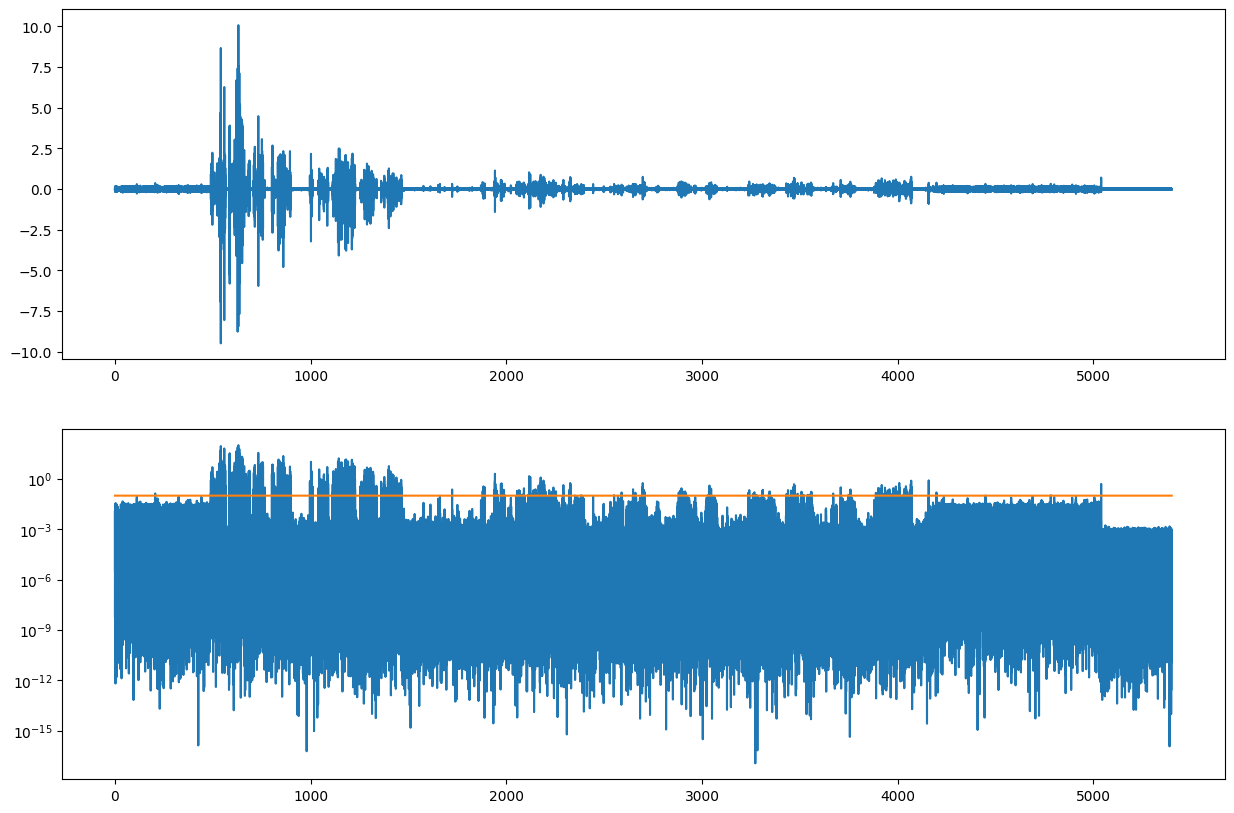

In [28]:
z = waveforms[2].data
t = waveforms[2].times()

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(t, z)
ax[1].plot(t, z**2)
ax[1].set_yscale('log')
ax[1].plot(t, np.ones_like(t)*0.1)
# ax.set_xlim(27490, 27493)
# ax.set_ylim(-5, 5)

array([0.00225155, 0.02359619, 0.01677763])

In [9]:
t.max()

5400.0